## Handcraft Features

This notebook runs different ML models using the mean and st.dev. of the x,y,z accelerometer and gyroscope measurements for each sample (window of 2 secs.).

The test/train split is random, and thus includes samples from 10 subjects in both the train and test sets (5 subjects are held out for validation).

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import pickle

In [170]:
thigh100 = pd.read_pickle('./data/thigh_clean.pkl')

In [171]:
thigh100.head()

,attr_time_gyr,attr_x_gyr,attr_y_gyr,attr_z_gyr,attr_time_acc,attr_x_acc,attr_y_acc,attr_z_acc,activity,label,subject,sample_num
800,1435996984038,-0.786994,-0.328964,0.244081,1435996984038,0.469264,4.292205,1.912369,climbingdown,0,1,8
801,1435996984056,-0.539593,-0.340265,0.329907,1435996984056,0.769736,5.878364,2.906561,climbingdown,0,1,8
802,1435996984076,-0.334953,-0.454802,0.377860,1435996984076,1.098939,7.167043,3.312977,climbingdown,0,1,8
803,1435996984099,-0.086331,-0.496036,0.339070,1435996984099,1.409586,6.937798,4.225766,climbingdown,0,1,8
804,1435996984118,0.157099,-0.525052,0.350982,1435996984118,1.442507,6.427235,5.054759,climbingdown,0,1,8


In [172]:
st_devs = thigh100.groupby(['activity','subject','sample_num']).std().add_prefix('std_')
means = thigh100.groupby(['activity','subject','sample_num']).mean().add_prefix('mean_')

In [173]:
means.head()

mean_attr_time_gyr  mean_attr_x_gyr  \
activity     subject sample_num                                        
climbingdown 1       8                 1.435997e+12         0.087604   
                     9                 1.435997e+12        -0.166086   
                     10                1.435997e+12         0.167801   
                     11                1.435997e+12        -0.271014   
                     13                1.435997e+12        -0.047453   

                                 mean_attr_y_gyr  mean_attr_z_gyr  \
activity     subject sample_num                                     
climbingdown 1       8                 -0.277429         0.141031   
                     9                 -1.012663        -0.062882   
                     10                -0.480547         0.051044   
                     11                -0.662130        -0.022941   
                     13                -0.292410         0.159689   

                                 mean_attr_time_acc  mean_attr_x_acc  \
activity     subject sample_num                                        
climbingdown 1       8                 1.435997e+12         0.379439   
                     9                 1.435997e+12         0.155054   
                     10                1.435997e+12         0.311127   
                     11                1.435997e+12         0.001209   
                     13                1.435997e+12         0.445256   

                                 mean_attr_y_acc  mean_attr_z_acc  mean_label  
activity     subject sample_num                                                
climbingdown 1       8                  9.024692         2.418964         0.0  
                     9                  9.439451         1.640513         0.0  
                     10                 8.968662         2.061090         0.0  
                     11                 9.386025         1.909316         0.0  
                     13                 8.932270         2.273953         0.0

In [174]:
df = pd.concat([st_devs,means],axis=1)

In [175]:
df.reset_index(inplace=True)

In [176]:
df.head()

,activity,subject,sample_num,std_attr_time_gyr,std_attr_x_gyr,std_attr_y_gyr,std_attr_z_gyr,std_attr_time_acc,std_attr_x_acc,std_attr_y_acc,...,std_label,mean_attr_time_gyr,mean_attr_x_gyr,mean_attr_y_gyr,mean_attr_z_gyr,mean_attr_time_acc,mean_attr_x_acc,mean_attr_y_acc,mean_attr_z_acc,mean_label
0,climbingdown,1,8,581.291714,0.942661,0.855090,0.374873,582.030385,1.470079,3.465349,...,0.0,1.435997e+12,0.087604,-0.277429,0.141031,1.435997e+12,0.379439,9.024692,2.418964,0.0
1,climbingdown,1,9,579.635665,0.976116,0.803382,0.449999,579.373594,1.566840,3.024721,...,0.0,1.435997e+12,-0.166086,-1.012663,-0.062882,1.435997e+12,0.155054,9.439451,1.640513,0.0
2,climbingdown,1,10,582.685275,0.995383,1.088734,0.458140,582.662663,2.012424,3.810429,...,0.0,1.435997e+12,0.167801,-0.480547,0.051044,1.435997e+12,0.311127,8.968662,2.061090,0.0
3,climbingdown,1,11,580.331920,1.016299,1.113550,0.605436,581.116097,1.996506,3.389655,...,0.0,1.435997e+12,-0.271014,-0.662130,-0.022941,1.435997e+12,0.001209,9.386025,1.909316,0.0
4,climbingdown,1,13,581.322631,1.065192,0.959656,0.362656,581.596644,1.581883,3.813839,...,0.0,1.435997e+12,-0.047453,-0.292410,0.159689,1.435997e+12,0.445256,8.932270,2.273953,0.0


In [177]:
mean_by_activity = df.groupby('activity').mean()

In [178]:
mean_by_activity.head()

,subject,sample_num,std_attr_time_gyr,std_attr_x_gyr,std_attr_y_gyr,std_attr_z_gyr,std_attr_time_acc,std_attr_x_acc,std_attr_y_acc,std_attr_z_acc,std_label,mean_attr_time_gyr,mean_attr_x_gyr,mean_attr_y_gyr,mean_attr_z_gyr,mean_attr_time_acc,mean_attr_x_acc,mean_attr_y_acc,mean_attr_z_acc,mean_label
activity,,,,,,,,,,,,,,,,,,,,
climbingdown,5.367550,9682.772469,585.607274,1.484772,1.698058,0.977293,587.015860,3.149781,4.520211,3.846339,0.0,1.436672e+12,0.005402,-0.064390,0.022168,1.436672e+12,-0.075617,9.204797,0.913260,0.0
climbingup,5.433172,10078.316023,584.907803,1.275538,1.249151,0.993291,585.045634,2.723064,3.937428,3.082760,0.0,1.436392e+12,-0.042595,0.056548,0.015049,1.436392e+12,-1.114346,8.775524,0.523312,1.0
jumping,6.291498,12129.882591,584.825509,1.651643,2.051374,1.157754,584.809128,5.321329,7.739501,5.763828,0.0,1.437183e+12,-0.028400,0.020604,0.109032,1.437183e+12,1.167588,5.124218,0.703132,2.0
lying,5.502886,10561.785439,585.316080,0.006089,0.009842,0.005496,585.654643,0.031995,0.027780,0.031214,0.0,1.437213e+12,-0.014196,-0.005099,0.040730,1.437213e+12,-6.248263,-0.556938,4.861350,3.0
running,5.710970,11391.907595,584.294832,2.749754,3.243912,2.227458,584.314865,7.031595,9.096838,7.998937,0.0,1.436499e+12,-0.052279,0.015270,0.124815,1.436499e+12,0.406379,7.433662,-0.461570,4.0


In [179]:
mean_by_activity.columns

Index(['subject', 'sample_num', 'std_attr_time_gyr', 'std_attr_x_gyr',
       'std_attr_y_gyr', 'std_attr_z_gyr', 'std_attr_time_acc',
       'std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 'std_label',
       'mean_attr_time_gyr', 'mean_attr_x_gyr', 'mean_attr_y_gyr',
       'mean_attr_z_gyr', 'mean_attr_time_acc', 'mean_attr_x_acc',
       'mean_attr_y_acc', 'mean_attr_z_acc', 'mean_label'],
      dtype='object')

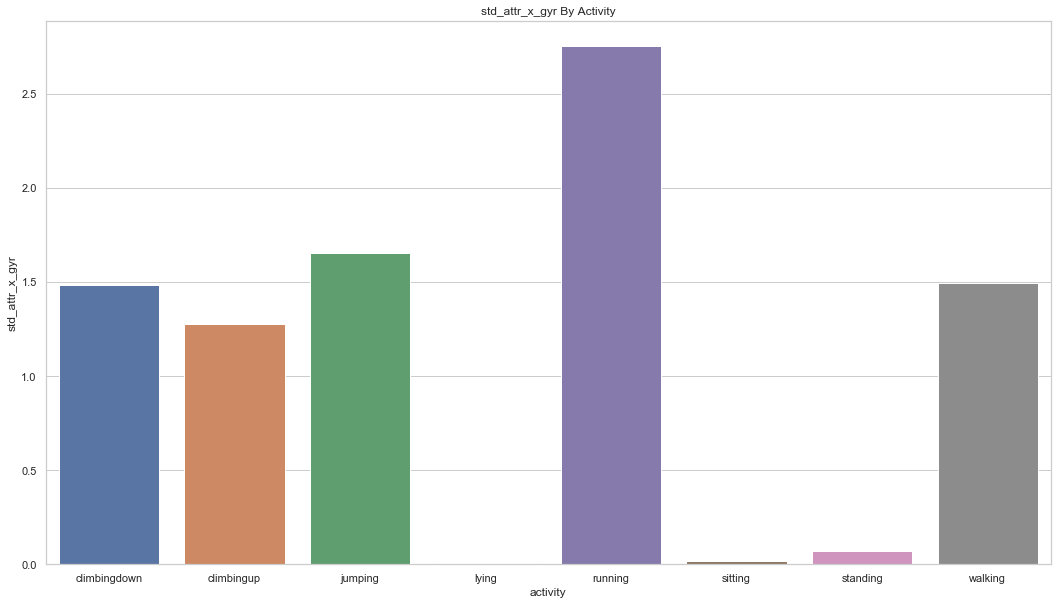

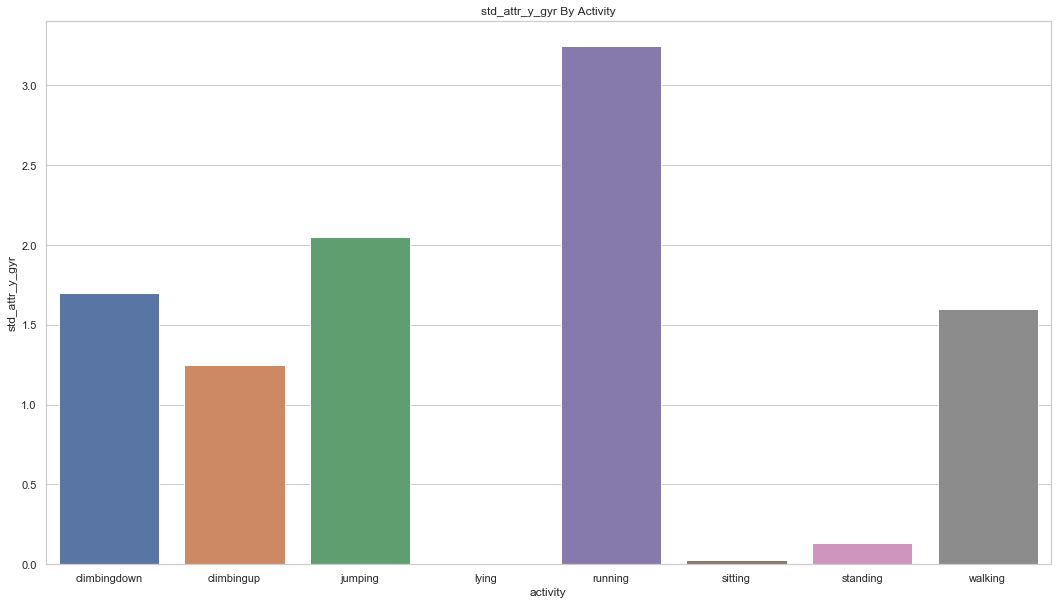

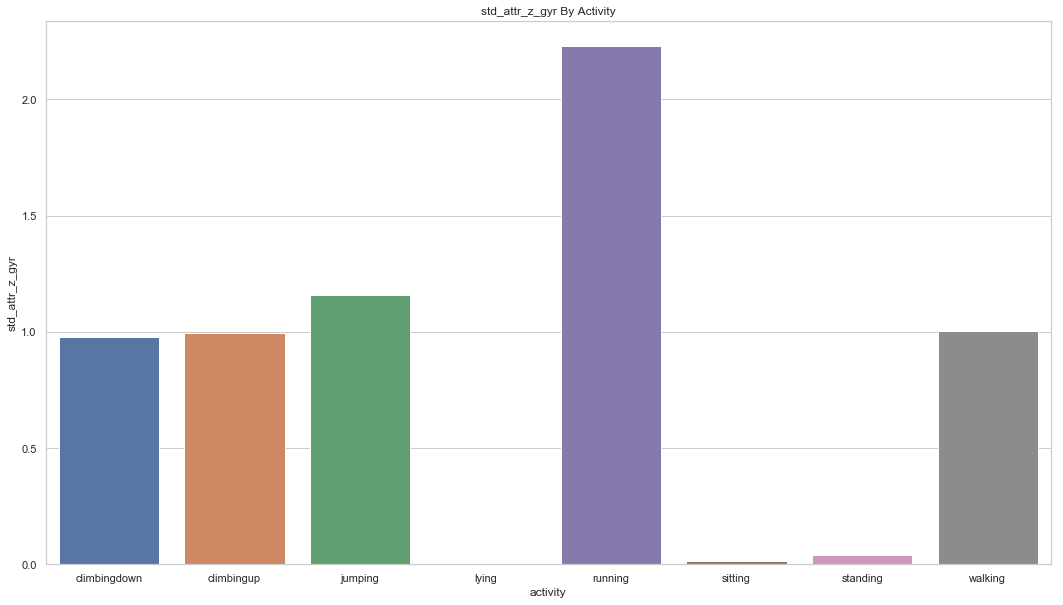

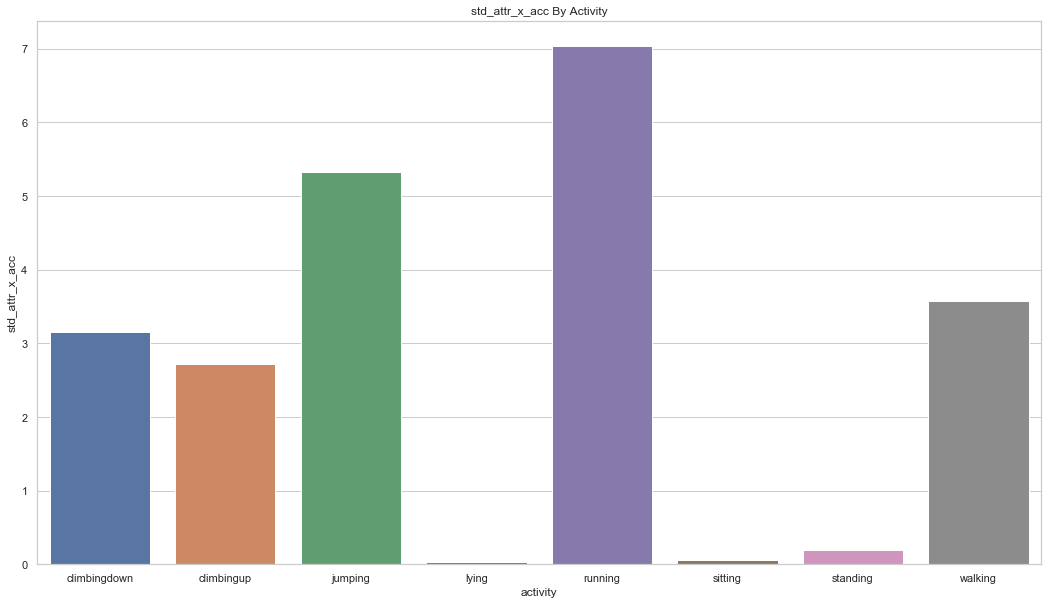

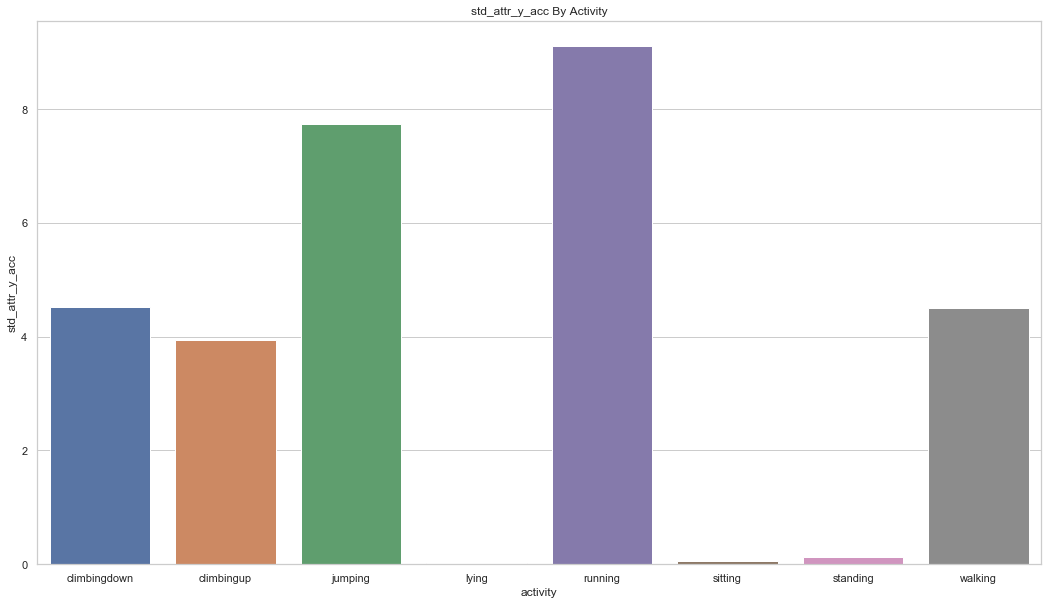

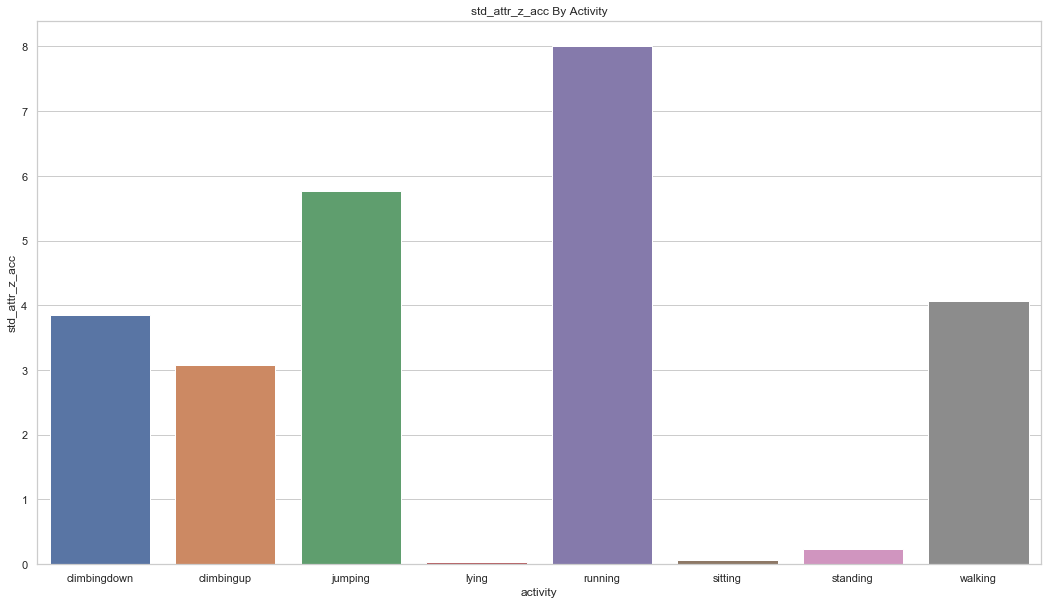

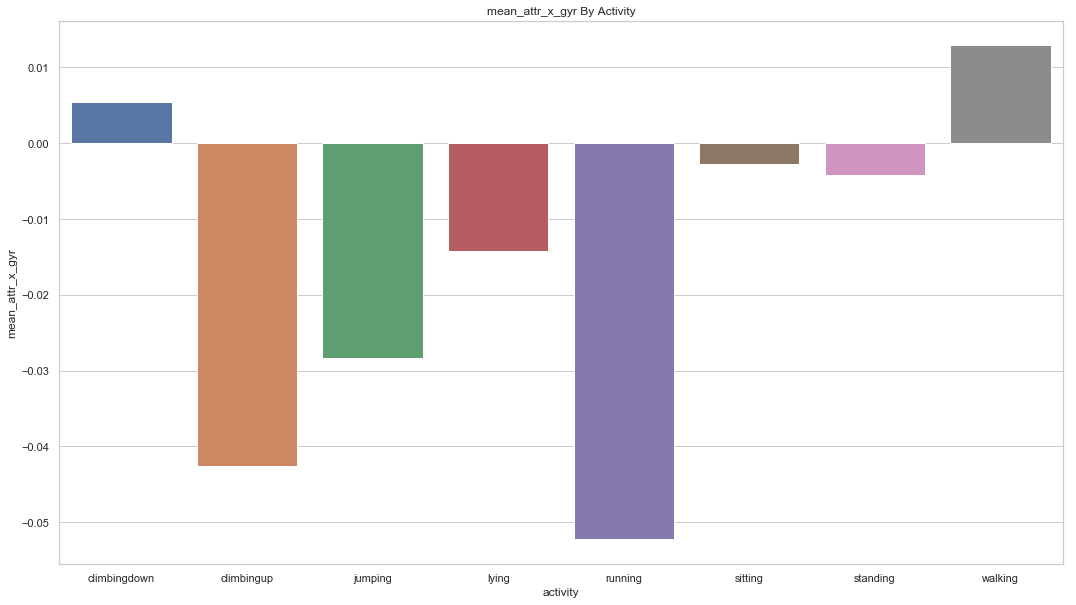

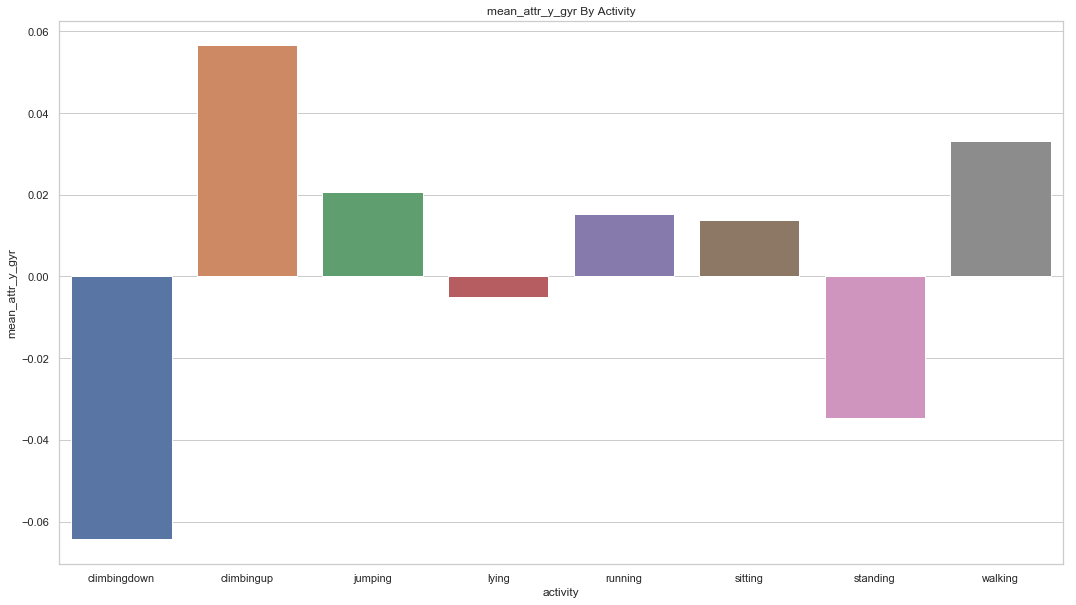

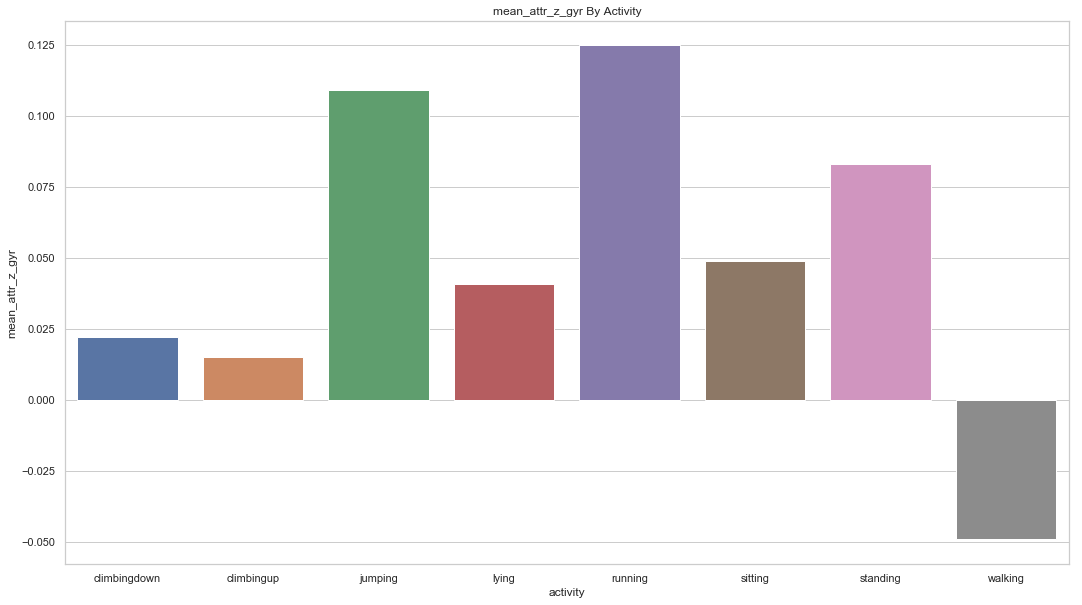

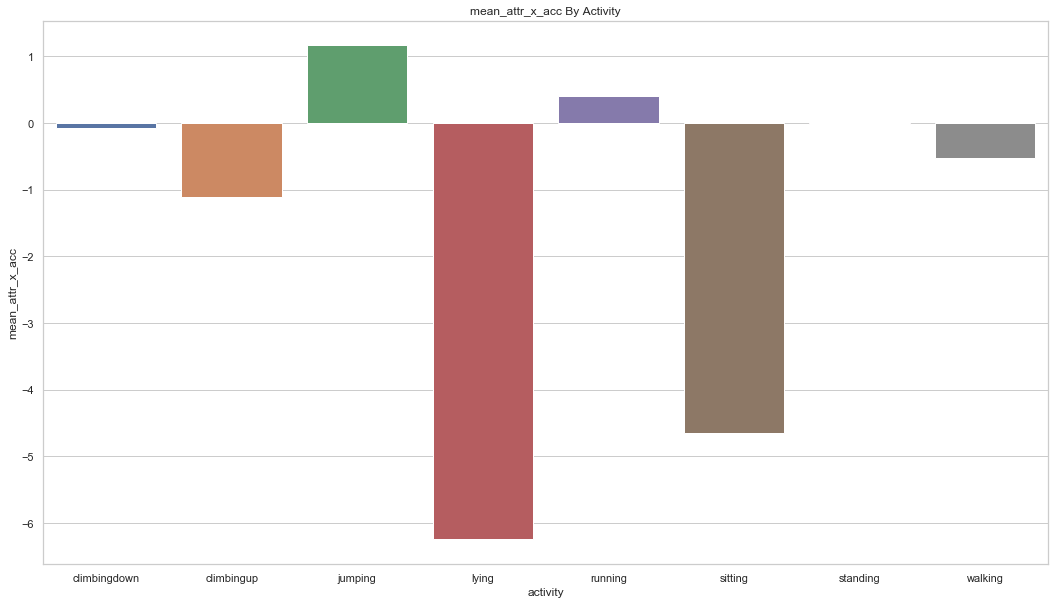

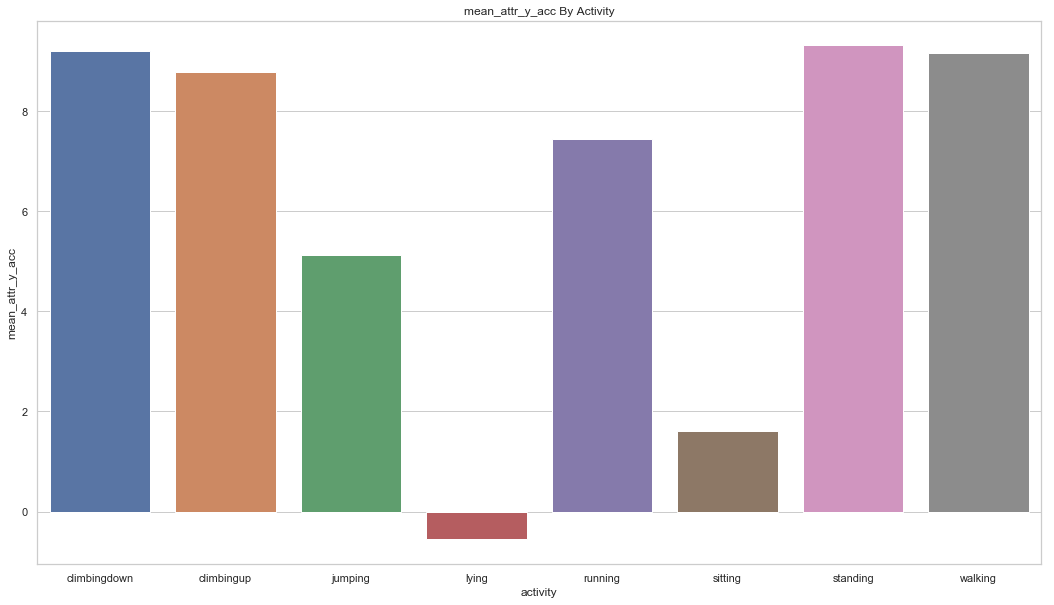

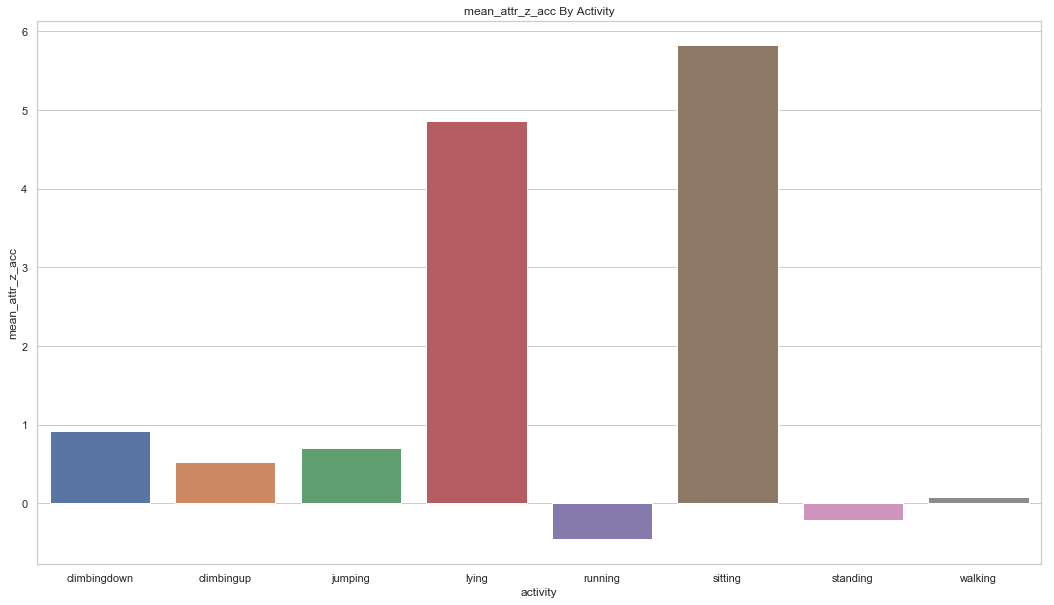

In [180]:
 import seaborn as sns
# activities =["climbingdown","climbingup","jumping","lying","running","sitting","standing","walking"]
plotcols = ['std_attr_x_gyr','std_attr_y_gyr', 'std_attr_z_gyr','std_attr_x_acc', 'std_attr_y_acc', 'std_attr_z_acc', 
       'mean_attr_x_gyr', 'mean_attr_y_gyr','mean_attr_z_gyr', 'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc']
for col in plotcols:
    plt.figure(figsize=(18,10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=mean_by_activity.index, y=mean_by_activity[col])
    plt.title(col+' By Activity')
#     plt.xlabel()
#     plt.ylabel(col)
    plt.show();

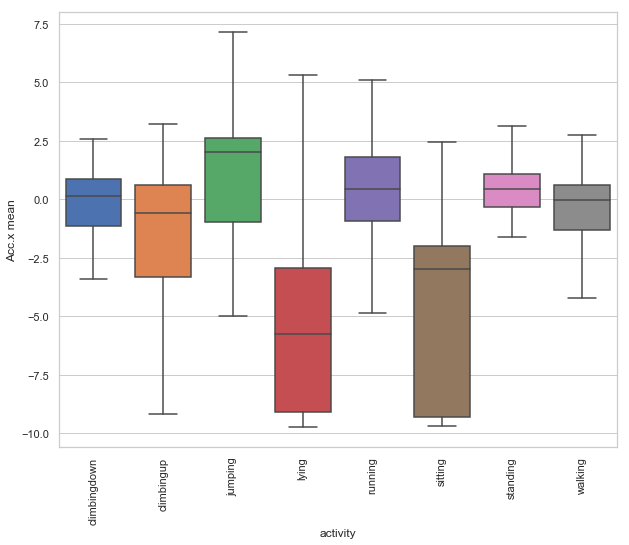

In [181]:
plt.figure(figsize=(10,8))
sns.boxplot(x='activity', y='mean_attr_x_acc',data=df, showfliers=False, saturation=1)
plt.ylabel('Acc.x mean')
plt.xticks(rotation=90)
plt.show()

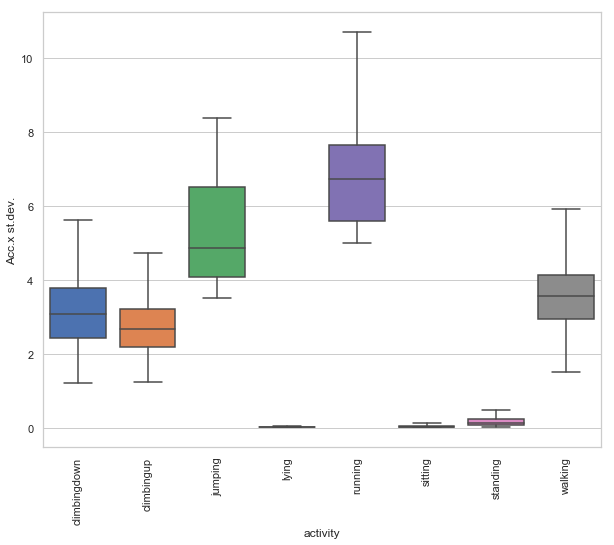

In [182]:
plt.figure(figsize=(10,8))
sns.boxplot(x='activity', y='std_attr_x_acc',data=df, showfliers=False, saturation=1)
plt.ylabel('Acc.x st.dev.')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

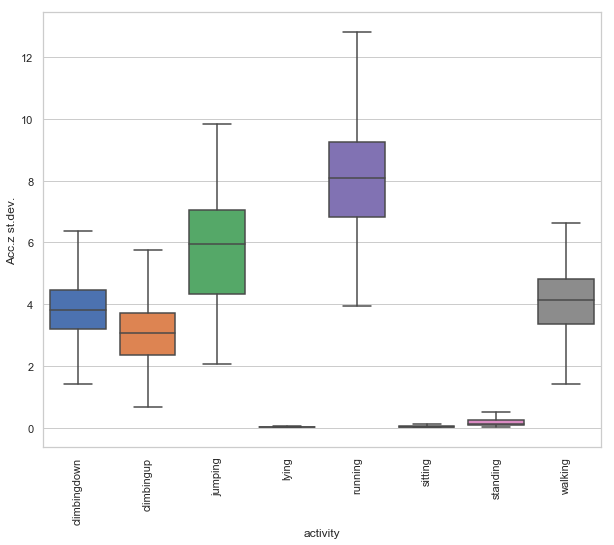

In [193]:
plt.figure(figsize=(10,8))
sns.boxplot(x='activity', y='std_attr_z_acc',data=df, showfliers=False, saturation=1)
plt.ylabel('Acc.z st.dev.')
# plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
# plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='m')
plt.xticks(rotation=90)
plt.show()

# Classification Models

In [183]:
from statsmodels.api import add_constant,MNLogit
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,ExtraTreesClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score,accuracy_score
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB,GaussianNB

In [184]:
df.columns

Index(['activity', 'subject', 'sample_num', 'std_attr_time_gyr',
       'std_attr_x_gyr', 'std_attr_y_gyr', 'std_attr_z_gyr',
       'std_attr_time_acc', 'std_attr_x_acc', 'std_attr_y_acc',
       'std_attr_z_acc', 'std_label', 'mean_attr_time_gyr', 'mean_attr_x_gyr',
       'mean_attr_y_gyr', 'mean_attr_z_gyr', 'mean_attr_time_acc',
       'mean_attr_x_acc', 'mean_attr_y_acc', 'mean_attr_z_acc', 'mean_label'],
      dtype='object')

In [185]:
y = df.activity

In [186]:
X = df.drop(columns=['activity', 'subject', 'sample_num','std_label','mean_label','std_attr_time_gyr',
                     'std_attr_time_acc','mean_attr_time_gyr','mean_attr_time_acc'])

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state = 42)

In [187]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [188]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

C:\Users\pauls\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\pauls\.conda\envs\dsi\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Training F1 score is: 0.758
Testing F1 score is: 0.743


In [189]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 0.969
Testing F1 score is: 0.947


In [191]:
model = DecisionTreeClassifier(max_depth=20)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 1.000
Testing F1 score is: 0.912


In [192]:
model = BaggingClassifier(max_features=.8,max_samples=1.0,n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 1.000
Testing F1 score is: 0.963


In [162]:
model = RandomForestClassifier(max_depth=20,random_state=42,min_samples_leaf=1,n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 1.000
Testing F1 score is: 0.950


In [163]:
model = ExtraTreesClassifier(max_depth=20,max_leaf_nodes=None,n_estimators=100)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 0.998
Testing F1 score is: 0.950


In [115]:
model = AdaBoostClassifier(RandomForestClassifier(max_depth=20,random_state=42,min_samples_leaf=1,n_estimators=100),learning_rate=1.0,random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 0.998
Testing F1 score is: 0.948


In [164]:
model = svm.SVC(kernel='rbf',gamma='scale',C=2.0)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')

Training F1 score is: 0.917
Testing F1 score is: 0.910


In [165]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
print(f'Training F1 score is: {f1_score(y_train,y_pred_train,average="macro"):.3f}')
print(f'Testing F1 score is: {f1_score(y_test,y_pred,average="macro"):.3f}')
# NOTE: dropping the columns for std of gyroscope x,y,z values increased train F1 to 0.673

Training F1 score is: 0.629
Testing F1 score is: 0.622


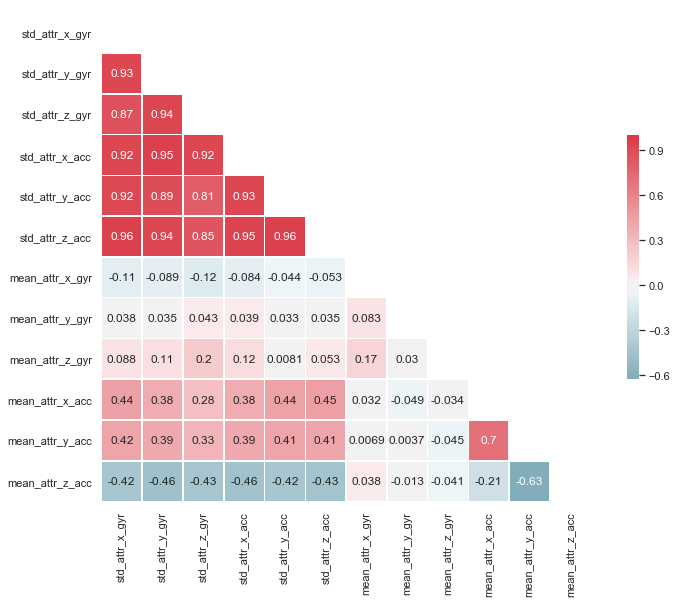

In [166]:
# source: https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(13, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [66]:
X = add_constant(X)

C:\Users\pauls\.conda\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
X.head()

,std_attr_x_gyr,std_attr_y_gyr,std_attr_z_gyr,std_attr_x_acc,std_attr_y_acc,std_attr_z_acc,mean_attr_x_gyr,mean_attr_y_gyr,mean_attr_z_gyr,mean_attr_x_acc,mean_attr_y_acc,mean_attr_z_acc
0,0.003208,0.004846,0.002879,0.014366,0.011870,0.013727,-0.021411,-0.075070,0.191922,-0.744758,9.274814,2.047569
1,0.003425,0.004124,0.002853,0.014516,0.011234,0.014858,-0.020886,-0.074762,0.192169,-0.744351,9.274730,2.046779
2,0.003822,0.005771,0.003249,0.014756,0.010528,0.013092,-0.022025,-0.076054,0.191228,-0.739617,9.276885,2.045229
3,0.003180,0.003495,0.002691,0.012145,0.009997,0.011631,-0.021219,-0.074850,0.192484,-0.736684,9.278334,2.041135
4,0.024814,0.020402,0.025647,0.054283,0.056692,0.052140,-0.015914,-0.079395,0.201210,-0.720661,9.271325,2.042553


In [46]:
y.shape

(21949,)

In [67]:
X.shape

(21949, 13)

In [68]:
smodel = MNLogit(y,X)

In [73]:
model_fitted=smodel.fit(method='bfgs',maxiter=5000)._results

Optimization terminated successfully.
         Current function value: 0.765315
         Iterations: 540
         Function evaluations: 544
         Gradient evaluations: 544


In [74]:
model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               activity   No. Observations:                21949
Model:                        MNLogit   Df Residuals:                    21858
Method:                           MLE   Df Model:                           84
Date:                Mon, 20 May 2019   Pseudo R-squ.:                  0.6159
Time:                        23:05:16   Log-Likelihood:                -16798.
converged:                       True   LL-Null:                       -43734.
                                        LLR p-value:                     0.000
====================================================================================
activity=climbingup       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  28.0989      0.877     32.054      0.000      26.381      29.817
std_attr_x_gyr          1.6092      0.149     10.790      0.000       1.317       1.901
std_attr_y_gyr         -4.3020      0.140    -30.683      0.000      -4.577      -4.027
std_attr_z_gyr          3.8144      0.158     24.118      0.000       3.504       4.124
std_attr_x_acc         -1.4605      0.070    -20.890      0.000      -1.598      -1.324
std_attr_y_acc          0.2462      0.050      4.920      0.000       0.148       0.344
std_attr_z_acc          0.2945      0.068      4.337      0.000       0.161       0.428
mean_attr_x_gyr        -2.5472      0.240    -10.611      0.000      -3.018      -2.077
mean_attr_y_gyr         2.0007      0.155     12.940      0.000       1.698       2.304
mean_attr_z_gyr         0.1560      0.313      0.498      0.619      -0.458       0.770
mean_attr_x_acc        -0.0248      0.031     -0.790      0.430      -0.087       0.037
mean_attr_y_acc        -2.7130      0.089    -30.543      0.000      -2.887      -2.539
mean_attr_z_acc        -1.4648      0.051    -28.941      0.000      -1.564      -1.366
---------------------------------------------------------------------------------------
activity=jumping       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               35.6867      0.943     37.834      0.000      33.838      37.535
std_attr_x_gyr      -2.9854      0.249    -11.966      0.000      -3.474      -2.496
std_attr_y_gyr      -1.7331      0.264     -6.572      0.000      -2.250      -1.216
std_attr_z_gyr      -0.6362      0.327     -1.946      0.052      -1.277       0.004
std_attr_x_acc      -1.3537      0.108    -12.579      0.000      -1.565      -1.143
std_attr_y_acc       1.5289      0.086     17.829      0.000       1.361       1.697
std_attr_z_acc       0.5052      0.119      4.245      0.000       0.272       0.738
mean_attr_x_gyr     -4.2082      0.589     -7.149      0.000      -5.362      -3.055
mean_attr_y_gyr      2.1227      0.492      4.316      0.000       1.159       3.087
mean_attr_z_gyr      8.3164      0.682     12.186      0.000       6.979       9.654
mean_attr_x_acc      1.0221      0.054     18.887      0.000       0.916       1.128
mean_attr_y_acc     -4.1155      0.097    -42.601      0.000      -4.305      -3.926
mean_attr_z_acc     -1.8908      0.069    -27.276      0.000      -2.027      -1.755
------------------------------------------------------------------------------------
 activity=lying       coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              35.7554      0.954     37.499      0.000      33.887      37.624
std_attr_x_gyr     -1.0351      0.808     -1.282      0.200      -2.618       0.548
std_attr_y_gyr     -4.6971      0.814     -5.769    